In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

Library verification

In [3]:
#0- Package verification
packs = ['statsmodels.tsa.arima.model','matplotlib.pyplot', 'pandas', 'csv','numpy']

def verificar_pack(pack):
    try:
        importlib.import_module(pack)
        return True
    except ImportError:
        return False

for pack in packs:
    if verificar_pack(pack):
        print(f'O pacote "{pack}" está instalado.')
    else:
        print(f'O pacote "{pack}" não está instalado.')

O pacote "statsmodels.tsa.arima.model" está instalado.
O pacote "matplotlib.pyplot" está instalado.
O pacote "pandas" está instalado.
O pacote "csv" está instalado.
O pacote "numpy" está instalado.


#III-Analysis & Forecasting

Seasonal fluctuation graph analysis for statistical model fit test.

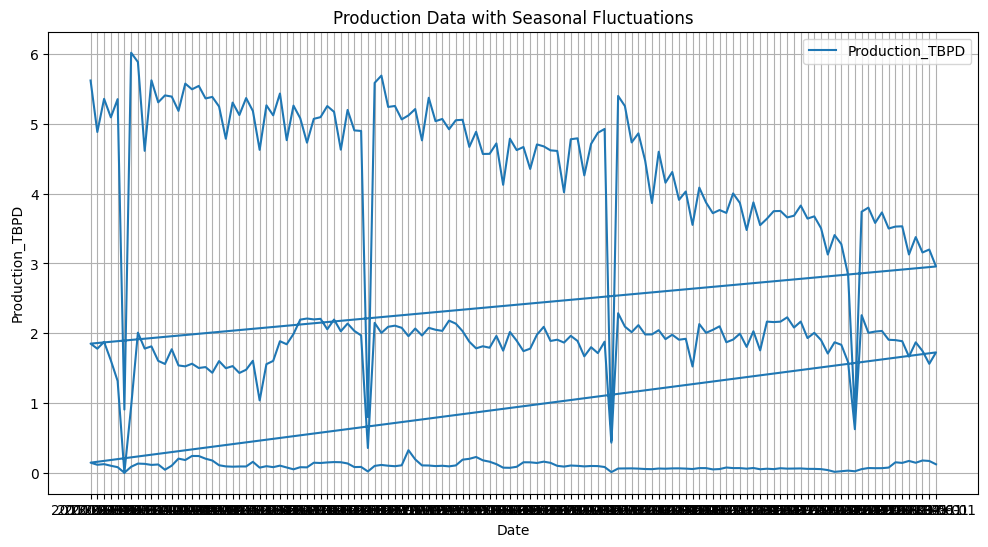

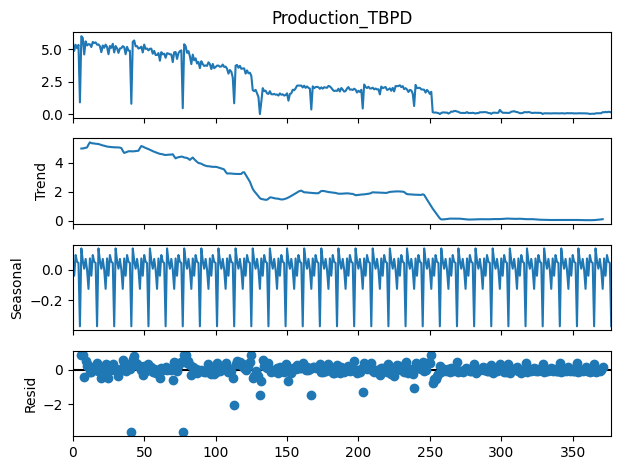

In [5]:
#Fluctuation

data = 'final_data.csv'
df = pd.read_csv(data)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Production_TBPD'], label='Production_TBPD')
plt.xlabel('Date')
plt.ylabel('Production_TBPD')
plt.title('Production Data with Seasonal Fluctuations')
plt.legend()
plt.grid(True)
plt.show()

#Seasonal decomposition

result = seasonal_decompose(df['Production_TBPD'], model='additive', period=12)
result.plot()
plt.show()


With these images, the Boolean code is provided for the C, D, Q arguments in the ARIMA statistical model (time production fluctuations). Now, I will proceed to fit the data into the model.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#Divide data for training and validation

train = df['Production_TBPD'][:-12]
validation = df['Production_TBPD'][-12:]

#Fit model (order is acording flutuation map)

model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

#Adjust timestamps

forecast_steps = 16
forecast_values = model_fit.forecast(steps=forecast_steps)

Final dataframe 

In [ ]:
forecast_index = pd.date_range(start='2023-06-01', periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Date': forecast_index, 'Production_TBPD_Forecast': forecast_values})

forecast_df.to_csv('outputIII_data.csv')
print(forecast_df)

Visualization

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Norwegian Oil Production forecast')
plt.plot(df.index, df['Production_TBPD'], label='Historical Data')
plt.plot(forecast_df['Date'], forecast_df['Production_TBPD_Forecast'], label='Forecast', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Production (Barrels Per Day)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 0.35)

plt.savefig('forecast_graph.png')

plt.show()